# 脸部特征点侦测

## 使用Face-Recognition套件

## 载入相关套件

In [1]:
# 安装套件： pip install face-recognition
# 载入相关套件
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
import face_recognition

## 载入并显示图档

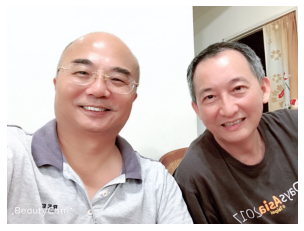

In [2]:
# 载入图档
image_file = "./images_face/classmates.jpg"
image = plt.imread(image_file)

# 显示图像
plt.imshow(image)
plt.axis('off')
plt.show()

## 侦测脸部特征点并显示

chin 特征点: [(958, 485), (968, 525), (982, 562), (999, 598), (1022, 630), (1054, 657), (1092, 677), (1135, 693), (1179, 689), (1220, 670), (1249, 639), (1274, 606), (1291, 567), (1298, 524), (1296, 478), (1291, 433), (1283, 387)]

left_eyebrow 特征点: [(969, 464), (978, 434), (1002, 417), (1032, 413), (1061, 415)]

right_eyebrow 特征点: [(1119, 397), (1142, 373), (1172, 361), (1204, 364), (1228, 382)]

nose_bridge 特征点: [(1098, 440), (1107, 477), (1115, 512), (1124, 548)]

nose_tip 特征点: [(1092, 557), (1112, 562), (1133, 565), (1151, 552), (1167, 538)]

left_eye 特征点: [(1006, 473), (1019, 458), (1038, 454), (1058, 461), (1042, 467), (1024, 472)]

right_eye 特征点: [(1147, 436), (1160, 417), (1179, 409), (1201, 414), (1186, 423), (1167, 430)]

top_lip 特征点: [(1079, 606), (1100, 595), (1121, 586), (1142, 585), (1160, 576), (1186, 570), (1215, 567), (1207, 571), (1164, 585), (1145, 593), (1125, 596), (1088, 605)]

bottom_lip 特征点: [(1215, 567), (1197, 598), (1176, 619), (1155, 628), (1134, 631), (1109, 6

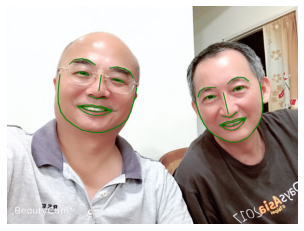

In [3]:
# 侦测脸部特征点并显示
from PIL import Image, ImageDraw

# 载入图档
image = face_recognition.load_image_file(image_file)

# 转为 Pillow 图像格式
pil_image = Image.fromarray(image)

# 取得图像绘图物件
d = ImageDraw.Draw(pil_image)

# 侦测脸部特征点
face_landmarks_list = face_recognition.face_landmarks(image)

for face_landmarks in face_landmarks_list:
    # 显示五官特征点
    for facial_feature in face_landmarks.keys():
        print(f"{facial_feature} 特征点: {face_landmarks[facial_feature]}\n")

    # 绘制特征点
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=5, fill='green')
    
# 显示图像
plt.imshow(pil_image)
plt.axis('off')
plt.show()

## 使用dlib套件

## 载入相关套件

In [1]:
# 载入相关套件
import dlib
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
from imutils import face_utils

## 载入并显示图档

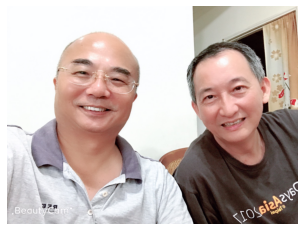

In [3]:
# 载入图档
image_file = "./images_face/classmates.jpg"
image = plt.imread(image_file)

# 显示图像
plt.imshow(image)
plt.axis('off')
plt.show()

## 侦测脸部特征点并显示

侦测到2张脸部.


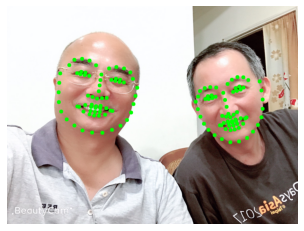

In [5]:
# 载入 dlib 以 HOG 基础的脸部侦测模型
model_file = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(model_file)

# 侦测图像的脸部
rects = detector(image)

print(f'侦测到{len(rects)}张脸部.')
# 侦测每张脸的特征点
for (i, rect) in enumerate(rects):
    # 侦测特征点
    shape = predictor(image, rect)
    
    # 转为 NumPy 阵列
    shape = face_utils.shape_to_np(shape)

    # 标示特征点
    for (x, y) in shape:
        cv2.circle(image, (x, y), 10, (0, 255, 0), -1)
        
# 显示图像
plt.imshow(image)
plt.axis('off')
plt.show()

## 侦测视讯档

In [19]:
# 读取视讯档
cap = cv2.VideoCapture('./images_face/hamilton_clip.mp4')
while True:
    # 读取一帧影像
    _, image = cap.read()
    
    # 侦测图像的脸部
    rects = detector(image)    
    for (i, rect) in enumerate(rects):
        # 侦测特征点
        shape = predictor(image, rect)
        shape = face_utils.shape_to_np(shape)
    
        # 标示特征点
        for (x, y) in shape:
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
    
    # 显示影像
    cv2.imshow("Output", image)

    k = cv2.waitKey(5) & 0xFF    # 按 Esc 跳离回圈
    if k == 27:
        break

# 关闭输入档    
cap.release()
# 关闭所有视窗
cv2.destroyAllWindows()